![](img/571_banner.png)

# Course Introduction 

UBC Master of Data Science program, 2023-24

Instructor: Varada Kolhatkar

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
sys.path.append(os.path.join(os.path.abspath(""), "code"))
from IPython.display import HTML, display
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

plt.rcParams["font.size"] = 16
pd.set_option("display.max_colwidth", 200)

## Learning outcomes 
From this lecture, you will be able to 

- explain the motivation to study machine learning;
- explain supervised machine learning; 
- navigate through the course material;
- be familiar with the policies and how the class is going to run; 

<br><br>

## Characters in this course? 

- DSCI 571 teaching staff (me, the TAs, and our co-ordinator, Betty Zhao)
- Eva (a fictitious enthusiastic student)
- And you all, of course 🙂! 

### Meet your instructor

<!-- <center>
<img src="img/profile.png" height="300" width="300">
</center>
     -->
     
![](img/profile.png)

- I am Varada Kolhatkar [[ʋəɾəda kɔːlɦəʈkər](https://en.wikipedia.org/wiki/International_Phonetic_Alphabet)]
- You can call me Varada. If Varada is hard for you, you can call me **V** or **Ada**.
- I am an Assistant Professor of Teaching in Computer Science.
- I did my Ph.D. in Computational Linguistics at the University of Toronto. 
- I've been teaching for MDS since October 2018.
- I will be teaching you four machine learning courses. 
- Contact information
    - Email: kvarada@cs.ubc.ca
    - Office: ICCS 237

### Meet 571 TAs

- Armin Saadat Boroujeni
- Daniel Ramandi
- Faeze Keshavarz
- Md Shahriar Rahim Siddiqui
- Negar Sadrzadeh
- Prajeet Bajpai


### Meet Eva (a fictitious persona)!

![](img/eva-hi.png)

Eva is among one of you. She has some experience in Python programming. She knows machine learning as a buzz word. During her recent internship, she has developed some interest and curiosity in the field. She wants to learn what is it and how to use it. She is a curious person and usually has a lot of questions!  

### You all

- Since we're going to spend the next 10 months with each other, I would like to know you a bit better. 
- Please fill out [Getting to know you survey](https://canvas.ubc.ca/courses/123600/quizzes/678319?module_item_id=6186562) when you get a chance. 

```{admonition} Attention!!
:class: important
You are welcome to ask questions by raising your hand.
There is also [a reflection Google Document](https://docs.google.com/document/d/109zUOV_j3Q12rnKFWWg7JXeCmqXKoWVtioSvEGyDuVw/edit?usp=sharing) for this course for your questions/comments/reflections. It will be great if you can write about your takeaways, struggle points, and general comments in this document so that I'll try to address those points in the next lecture. 
```

## Why machine learning (ML)? [[video](https://www.youtube.com/watch?v=-1hTcS5ZE4w&t=1s)]

```{seealso}
Check out [the accompanying video](https://www.youtube.com/watch?v=-1hTcS5ZE4w&t=1s) on this material. 
```

### Prevalence of ML

Let's look at some examples. 

<!-- <img src="../img/ml-examples.png" height="1000" width="1000">  -->
![](img/ml-examples.png)


- Image sources 
    - [Voice assistants](https://geeksfl.com/blog/best-voice-assistant/)
    - [Google News](https://news.google.com)    
    - [Recommendation systems](https://en.wikipedia.org/wiki/Recommender_system)
    - [Face Recognition source](https://startupleague.online/blog/3dss-tech-facial-recognition-technology/)
    - [Auto-completion](https://9to5google.com/2020/08/10/android-11-autofill-keyboard/)
    - [Stock market prediction](https://hbr.org/2019/12/what-machine-learning-will-mean-for-asset-managers)    
    - [Character recognition](https://en.wikipedia.org/wiki/Handwriting_recognition)    
    - [AlphaGo](https://deepmind.com/alphago-china)
    - [Self-driving cars](https://mc.ai/artificial-intelligence-in-self-driving-cars%E2%80%8A-%E2%80%8Ahow-far-have-we-gotten/)
    - [Drug discovery](https://www.nature.com/articles/d41586-018-05267-x)
    - [Cancer detection](https://venturebeat.com/2018/10/12/google-ai-claims-99-accuracy-in-metastatic-breast-cancer-detection/)

### Saving time and scaling products 

- Imagine writing a program for spam identification, i.e., whether an email is spam or non-spam. 
- Traditional programming 
    - Come up with rules using human understanding of spam messages. 
    - Time consuming and hard to come up with robust set of rules. 
- Machine learning
    - Collect large amount of data of spam and non-spam emails and let the machine learning algorithm figure out rules. 
- With machine learning, you're likely to 
    - Save time 
    - Customize and scale products 

<br><br>

## Supervised machine learning 

### Types of machine learning

Here are some typical learning problems. 

- **Supervised learning** ([Gmail spam filtering](https://support.google.com/a/answer/2368132?hl=en))
    - Training a model from input data and its corresponding targets to predict targets for new examples.     
- Unsupervised learning ([Google News](https://news.google.com/))
    - Training a model to find patterns in a dataset, typically an unlabeled dataset.
- Reinforcement learning ([AlphaGo](https://deepmind.com/research/case-studies/alphago-the-story-so-far))
    - A family of algorithms for finding suitable actions to take in a given situation in order to maximize a reward. 
- Recommendation systems ([Amazon item recommendation system](https://www.cs.umd.edu/~samir/498/Amazon-Recommendations.pdf))
    - Predict the "rating" or "preference" a user would give to an item.    

### What is supervised machine learning (ML)? 

- Training data comprises a set of observations ($X$) and their corresponding targets ($y$). 
- We wish to find a model function $f$ that relates $X$ to $y$.
- We use the model function to predict targets of new examples. 

![](img/sup-learning.png)
<!-- <img src="img/sup-learning.png" height="600" width="600">  -->


### Example: Predict whether a message is spam or not 

#### Input features $X$ and target $y$

```{note}
Do not worry about the code and syntax for now. 
```

```{note}
Download SMS Spam Collection Dataset from [here](https://www.kaggle.com/uciml/sms-spam-collection-dataset). 
```

#### Training a supervised machine learning model with $X$ and $y$

In [2]:
sms_df = pd.read_csv("data/spam.csv", encoding="latin-1")
sms_df = sms_df.drop(columns = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"])
sms_df = sms_df.rename(columns={"v1": "target", "v2": "sms"})
train_df, test_df = train_test_split(sms_df, test_size=0.10, random_state=42)
HTML(train_df.head().to_html(index=False))

In [3]:
X_train, y_train = train_df["sms"], train_df["target"]
X_test, y_test = test_df["sms"], test_df["target"]
clf = make_pipeline(CountVectorizer(max_features=5000), LogisticRegression(max_iter=5000))
clf.fit(X_train, y_train);

#### Predicting on unseen data using the trained model

In [4]:
pd.DataFrame(X_test[0:4])

sms
3245                                                  Funny fact Nobody teaches volcanoes 2 erupt, tsunamis 2 arise, hurricanes 2 sway aroundn no 1 teaches hw 2 choose a wife Natural disasters just happens
944   I sent my scores to sophas and i had to do secondary application for a few schools. I think if you are thinking of applying, do a research on cost also. Contact joke ogunrinde, her school is one m...
1044                                                                                                    We know someone who you know that fancies you. Call 09058097218 to find out who. POBox 6, LS15HB 150p
2484                                                                             Only if you promise your getting out as SOON as you can. And you'll text me in the morning to let me know you made it in ok.

```{note}
Do not worry about the code and syntax for now. 
```

In [5]:
pred_dict = {
    "sms": X_test[0:4],
    "spam_predictions": clf.predict(X_test[0:4]),
}
pred_df = pd.DataFrame(pred_dict)
pred_df.style.set_properties(**{"text-align": "left"})

**We have accurately predicted labels for the unseen text messages above!**

<br><br>

### (Supervised) machine learning: popular definition 
<blockquote>
A field of study that gives computers the ability to learn without being explicitly programmed. <br> -- Arthur Samuel (1959)
</blockquote>

ML is a different way to think about problem solving.

![](img/traditional-programming-vs-ML.png)
<!-- <img src="img/traditional-programming-vs-ML.png" height="700" width="700">  -->

### Examples

Let's look at some concrete examples of supervised machine learning. 

```{note}
Do not worry about the code at this point. Just focus on the input and output in each example.
```

#### Example 1: Predicting whether a patient has a liver disease or not

##### Input data

Suppose we are interested in predicting whether a patient has the disease or not. We are given some tabular data with inputs and outputs of liver patients, as shown below. The data contains a number of input features and a special column called "Target" which is the output we are interested in predicting. 

```{note}
Download the data from [here](https://www.kaggle.com/uciml/indian-liver-patient-records). 
```

```{note}
Download the data from [here](https://www.kaggle.com/uciml/indian-liver-patient-records). 
```

In [6]:
df = pd.read_csv("data/indian_liver_patient.csv")
df = df.drop(columns = ["Gender"])
df["Dataset"] = df["Dataset"].replace(1, "Disease")
df["Dataset"] = df["Dataset"].replace(2, "No Disease")
df.rename(columns={"Dataset": "Target"}, inplace=True)
train_df, test_df = train_test_split(df, test_size=4, random_state=42)
HTML(train_df.head().to_html(index=False))

##### Building a supervise machine learning model

Let's train a supervised machine learning model with the input and output above. 

In [7]:
from lightgbm.sklearn import LGBMClassifier

X_train = train_df.drop(columns=["Target"])
y_train = train_df["Target"]
X_test = test_df.drop(columns=["Target"])
y_test = test_df["Target"]
model = LGBMClassifier(random_state=123, verbose=-1)
model.fit(X_train, y_train)

LGBMClassifier(random_state=123, verbose=-1)

##### Model predictions on unseen data

- Given features of new patients below we'll use this model to predict whether these patients have the liver disease or not. 

In [8]:
HTML(X_test.reset_index(drop=True).to_html(index=False))

In [9]:
pred_df = pd.DataFrame({"Predicted_target": model.predict(X_test).tolist()})

df_concat = pd.concat([pred_df, X_test.reset_index(drop=True)], axis=1)
HTML(df_concat.to_html(index=False))

<br><br>

#### Example 2: Predicting the label of a given image 

Suppose you want to predict the label of a given image using supervised machine learning. We are using a pre-trained model here to predict labels of new unseen images. 

```{note}
Assuming that you have successfully created 571 `conda` environment on your computer, you'll have to install `torchvision` in 571 `conda` environment to run the following code. If you are unable to install `torchvision` on your laptop, please don't worry at this point. It's not crucial at this point. 

> conda activate 571
> conda install -c pytorch torchvision
```

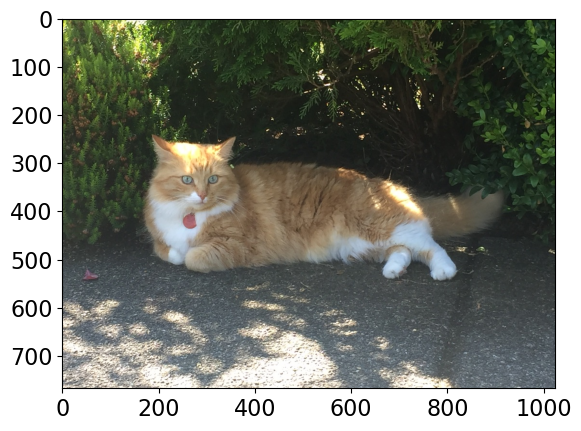

                         Class  Probability score
                     tiger cat              0.636
              tabby, tabby cat              0.174
Pembroke, Pembroke Welsh corgi              0.081
               lynx, catamount              0.011
--------------------------------------------------------------


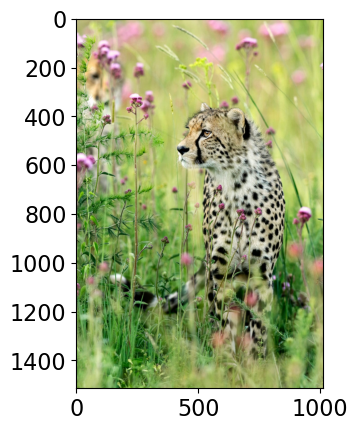

                                     Class  Probability score
         cheetah, chetah, Acinonyx jubatus              0.994
                  leopard, Panthera pardus              0.005
jaguar, panther, Panthera onca, Felis onca              0.001
       snow leopard, ounce, Panthera uncia              0.000
--------------------------------------------------------------


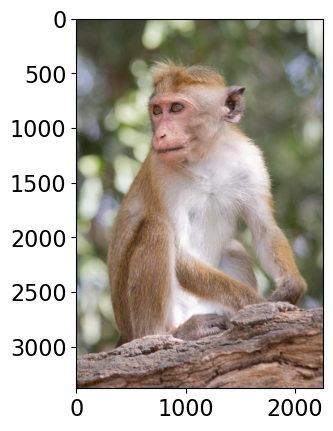

                                   Class  Probability score
                                 macaque              0.885
patas, hussar monkey, Erythrocebus patas              0.062
      proboscis monkey, Nasalis larvatus              0.015
                       titi, titi monkey              0.010
--------------------------------------------------------------


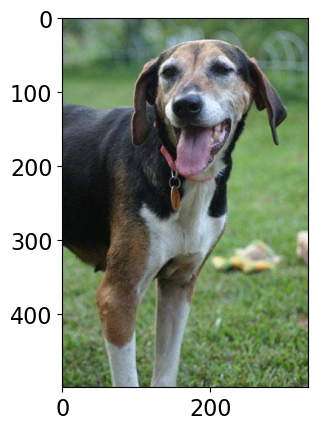

                        Class  Probability score
Walker hound, Walker foxhound              0.582
             English foxhound              0.144
                       beagle              0.068
                  EntleBucher              0.059
--------------------------------------------------------------


In [10]:
import img_classify
from PIL import Image
import glob
import matplotlib.pyplot as plt
# Predict topn labels and their associated probabilities for unseen images
images = glob.glob("data/test_images/*.*")
class_labels_file = 'data/imagenet_classes.txt'
for img_path in images:
    img = Image.open(img_path).convert('RGB')
    img.load()
    plt.imshow(img)
    plt.show();    
    df = img_classify.classify_image(img_path, class_labels_file)
    print(df.to_string(index=False))
    print("--------------------------------------------------------------")

<br><br>

#### Example 3: Predicting sentiment expressed in a movie review

Suppose you are interested in predicting whether a given movie review is positive or negative. You can do it using supervised machine learning. 

```{note}
Download the data from [here](https://www.kaggle.com/utathya/imdb-review-dataset). 
```

In [11]:
imdb_df = pd.read_csv("data/imdb_master.csv", encoding="ISO-8859-1")
imdb_df = imdb_df[imdb_df["label"].str.startswith(("pos", "neg"))]
imdb_df = imdb_df.drop(columns = ["Unnamed: 0", "type", "file"])
imdb_df.rename(columns={"label": "target"}, inplace=True)
train_df, test_df = train_test_split(imdb_df, test_size=0.10, random_state=123)
HTML(train_df.head().to_html(index=False))

In [12]:
# Build an ML model
X_train, y_train = train_df["review"], train_df["target"]
X_test, y_test = test_df["review"], test_df["target"]

clf = make_pipeline(CountVectorizer(max_features=5000), LogisticRegression(max_iter=5000))
clf.fit(X_train, y_train);

In [13]:
# Predict on unseen data using the built model
pred_dict = {
    "reviews": X_test[0:4],
    "sentiment_predictions": clf.predict(X_test[0:4]),
}
pred_df = pd.DataFrame(pred_dict)
pred_df.style.set_properties(**{"text-align": "left"})

<br><br>

#### Example 4: Predicting housing prices

Suppose we want to predict housing prices given a number of attributes associated with houses. 

```{note}
Download the data from [here](https://www.kaggle.com/harlfoxem/housesalesprediction). 
```

In [14]:
df = pd.read_csv("data/kc_house_data.csv")
df = df.drop(columns = ["id", "date"])
df.rename(columns={"price": "target"}, inplace=True)
train_df, test_df = train_test_split(df, test_size=0.2, random_state=4)
HTML(train_df.head().to_html(index=False))

In [15]:
# Build a regression model
from lightgbm.sklearn import LGBMRegressor

X_train, y_train = train_df.drop(columns= ["target"]), train_df["target"]
X_test, y_test = test_df.drop(columns= ["target"]), train_df["target"]

model = LGBMRegressor(verbose=-1)
model.fit(X_train, y_train);

In [16]:
# Predict on unseen examples using the built model
pred_df = pd.DataFrame(
    # {"Predicted target": model.predict(X_test[0:4]).tolist(), "Actual price": y_test[0:4].tolist()}
    {"Predicted_target": model.predict(X_test[0:4]).tolist()}
)
df_concat = pd.concat([pred_df, X_test[0:4].reset_index(drop=True)], axis=1)
HTML(df_concat.to_html(index=False))

To summarize, supervised machine learning can be used on a variety of problems and different kinds of data. 

<br><br>

### 🤔 Eva's questions

At this point, Eva is wondering about many questions. 

- How are we exactly "learning" whether a message is spam and ham? 
- What do you mean by "learn without being explicitly programmed"? The code has to be somewhere ... 
- Are we expected to get correct predictions for all possible messages? How does it predict the label for a message it has not seen before?  
- What if the model mis-labels an unseen example? For instance, what if the model incorrectly predicts a non-spam as a spam? What would be the consequences? 
- How do we measure the success or failure of spam identification? 
- If you want to use this model in the wild, how do you know how reliable it is?  
- Would it be useful to know how confident the model is about the predictions rather than just a yes or a no?

It's great to think about these questions right now. But Eva has to be patient. By the end of this course you'll know answers to many of these questions!  

![](img/eva-qm.png)

### Machine learning workflow 

Supervised machine learning is quite flexible; it can be used on a variety of problems and different kinds of data. Here is a typical workflow of a supervised machine learning systems.  

![](img/ml-workflow.png)

<!-- <img src="img/ml-workflow.png" height="800" width="800">  -->

We will build machine learning pipelines in this course, focusing on some of the steps above. 

<br><br>

### ❓❓ Questions for you

### Select all of the following statements which are **True** (iClicker)

**iClicker cloud join link: https://join.iclicker.com/DAZZ**

- (A) Predicting spam is an example of machine learning. 
- (B) Predicting housing prices is not an example of machine learning. 
- (C) For problems such as spelling correction, translation, face recognition, spam identification, if you are a domain expert, it's usually faster and scalable to come up with a robust set of rules manually rather than building a machine learning model. 
- (D) If you are asked to write a program to find all prime numbers up to  a limit, it is better to implement one of the algorithms for doing so rather than using machine learning. 
- (E) Google News is likely be using machine learning to organize news. 
<br><br><br><br>

```{admonition} V's Solutions!
:class: tip, dropdown
A, D, E
```

<br><br>

## (Optional) Surveys 

- Please complete the "Getting to know you" survey on [Canvas](https://canvas.ubc.ca/courses/123600).
- Also, please complete the anonymous restaurant survey on Qualtrics [here](https://ubc.ca1.qualtrics.com/jfe/form/SV_73VuZiuwM1eDVrw).
  - We will analyze this data set in the coming weeks. 

<br><br>

## About this course <a name="4"></a>

### Course learning outcomes 
By the end of this course you'll be able to answer most of the above questions. 

By the end of this course, you will be able to:

- Describe supervised learning and its suitability for various tasks.
- Explain key machine learning concepts such as classification, regression, overfitting, and the trade-off in model complexity.
- Identify appropriate data preprocessing techniques for specific scenarios, provide reasons for their selection, and integrate them into machine learning pipelines.
- Develop an intuitive understanding of common machine learning algorithms.
- Build end-to-end supervised machine learning pipelines using Python and scikit-learn on real-world datasets.


### What we won't cover 

- I'll give you intuition of different ML algorithms but you won't be implementing the algorithms on your own. 
- Instead, we will focus on machine learning fundamentals, preprocessing, and building machine learning pipelines. 

### Course roadmap (tentative)

- Week 1
    - ML terminology, decision trees 
    - ML fundamentals 
- Week 2
    - KNNs, SVMs with RBF Kernels
    - Preprocessing
- Week 3
    - More preprocessing: text features
    - Hyperparameter optimization, optimization bias
- Week 4
    - Naive Bayes
    - Linear models 

### Map of ML courses in MDS 

![](img/MDS-ML-map.png)

<!-- <img src="img/MDS-ML-map.png" height="1500" width="1500">  -->

### Framework we will be using in this class 

- A number machine learning libraries are available.  
- We will be using `sklearn` libary, which is a popular ([more than 56k stars on Github](https://github.com/scikit-learn/scikit-learn)) Machine Learning library for Python. 

In [17]:
import IPython
url = "https://scikit-learn.org"
IPython.display.IFrame(width=1000, height=650, src=url)

### Checklist for you before the first class 

- [ ] Have you created [course `conda` environment](https://github.ubc.ca/MDS-2023-24/DSCI_571_sup-learn-1_students#installation) on your computer? 
- [ ] Did you watch the [course information video](https://youtu.be/-1hTcS5ZE4w)? 
- [ ] Did you watch the [assigned pre-recorded lecture videos](https://github.ubc.ca/MDS-2023-24/DSCI_571_sup-learn-1_students#lecture-schedule) for lecture 1?
- [ ] Have you read the [course README](https://github.ubc.ca/MDS-2023-24/DSCI_571_sup-learn-1_students) carefully, in particular the [course communication](https://github.ubc.ca/MDS-2023-24/DSCI_571_sup-learn-1_students#course-communication) section? 
- [ ] Are you on course Slack channel? 
- [ ] Are you able to access course [Canvas](https://canvas.ubc.ca/courses/123600) shell? 
- [ ] Are you able to access [Gradescope](https://www.gradescope.ca/courses/11554)? (If not, refer to the [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/).)
- [ ] (Optional) Did you complete the anonymous [restaurant survey on Qualtrics](https://ubc.ca1.qualtrics.com/jfe/form/SV_73VuZiuwM1eDVrw)?
- [ ] (Optional) Did you complete the [Getting to know you](https://canvas.ubc.ca/courses/123600/quizzes/678319) survey?

```{attention}
Note that the first couple of lectures are kind of fundamental and the videos are longish. I'm asking you to pre-watch all recorded videos for the first lecture before class. If this is too much workload for you (I'll take a poll), I'll reassess. 
```

<br><br>

## Summary

- Machine learning is a different paradigm for problem solving.    
- Very often it reduces the time you spend programming and helps customizing and scaling your products. 
- In supervised learning we are given a set of observations ($X$) and their corresponding targets ($y$) and we wish to find a model function $f$ that relates $X$ to $y$.
- Carefully read the course website. Make sure to complete the surveys.
- **The teaching team is dedicated to facilitating your learning and ensuring your success in the course.**
- If you have any concerns regarding the format, teaching approach, or any other aspect, please don't hesitate to get in touch. I will do my best to be accommodating and understanding.
- Let's have fun learning this material together!

![](img/eva-seeyou.png)